# Pertemuan III

### Deskripsi Dataset
Dataset ini berisi data hasil  survei terhadap lebih dari 100 responden untuk perilaku pembelian mereka di Starbucks.
Pendapatan ditampilkan dalam Ringgit Malaysia (RM).

### Konteks
Data ini dapat digunakan untuk memperoleh informasi yang dapat digunakan oleh pemangku kepentingan guna menganalisis dan mengetahui perilaku data pelanggan, mempertahankan pelanggan yang ada serta mengembangkan program marketing untuk menarik pelanggan tepat sasaran

### Isi
* Info demografis tentang pelanggan – jenis kelamin, rentang usia, status pekerjaan, rentang pendapatan
* Perilaku mereka saat ini dalam membeli Starbucks
* Fasilitas dan fitur Starbucks yang berkontribusi pada perilaku

### Apa yang bisa kita temukan ?
Apa karakteristik pelanggan yang akan terus membeli Starbucks?

Pada praktikum ini, Anda akan melakukan beberapa operasi dasar yaitu : 

* [Histogram](#1)
* [Outliers](#2)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [Effect size](#5)
* [Relationship Between Variables](#6)
* [Correlation](#7)
* [Covariance](#8)
* [Pearson Correlation](#9)
* [Spearman's Rank Correlation](#10)
* [Mean VS Median](#11)
* [Hypothesis Testing](#12)
* [Normal(Gaussian) Distribution and z-score](#13) 


# Panduan Praktikum

* Bacalah instruksi praktikum dengan seksama. 
* Lakukan instruksi pengerjaan ada pada setiap checkpoint (tips : cari tanda <<??>> atau '...' dan isilah dengan perintah yang tepat)
* notes : kode program akan memberikan informasi error jika Anda belum mengisi tanda <<??>> atau '..' dengan perintah yang tepat

3. Lakukan perhitungan summary nilai statistik (mean, standar deviasi, dan variance) dari fitur ...
4. Berdasarkan hasil ploting diagram heatmap, jelaskan korelasi yang ada antara fitur ... dan ...
5. Hitung nilai pearson correlation dari fitur ... dan ... Jelaskan arti dari nilai tersebut.
6. Lakukan uji hipotesis untuk kolom fitur ... dan ...  serta berikan penjelasan terhadap hasil dari uji hipotesis yang dilakukan. 
7. Tulis laporan hasil praktikum kalian dalam bentuk file .pdf dan silahkan Anda submit melalui akun v-class praktikum.

In [159]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
sns.set_context('notebook')
sns.set(rc={
    'figure.figsize':(16,4)
})
sns.set_palette('cool')
# from pandas.plotting import autocorrelation_plot

### Instuksi 1
Masukkan (bacalah) file dataset .csv  yang tersedia pada link https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/Starbucks%20satisfactory%20survey%20encode%20cleaned.csv dengan perintah pandas read.

In [160]:
# read data as pandas data frame
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/Starbucks%20satisfactory%20survey%20encode%20cleaned.csv"
data = pd.read_csv(url_data)


### Instruksi 2
Tampilkan 5 baris awal dari dataset yang digunakan dengan perintah head()

In [161]:
## Melihat 5 baris awal dari dataset yang digunakan
data.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


### Instruksi 2
Tampilkan dimensi dari dataset yang digunakan dengan perintah shape()

In [162]:
data.shape

(113, 33)

### Instruksi 3
Tampilkan kolom apa saja yang dimiliki oleh dataset yang digunakan dengan perintah columns()

In [163]:
data.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

In [164]:
### menampilkan nilai apa saja yang ada pada sebuah kolom
data['gender'].unique()

array([1, 0], dtype=int64)

### Instruksi 4
Tampilkan nilai berapa saja yang dimiliki oleh kolom dimiliki oleh timeSpend.

In [165]:
data.timeSpend.unique()

array([1, 0, 4, 2, 3], dtype=int64)

<a id="1"></a> <br>
## Histogram

* Menampilkan Berapa kali (frekuensi) setiap nilai muncul dalam kumpulan data. 
* Jenis deskripsi ini disebut distribusi variabel
* Cara paling umum untuk merepresentasikan distribusi variabel adalah histogram yaitu grafik yang menunjukkan frekuensi dari setiap nilai.
* Frequency = berapa kali setiap nilai muncul
* Contoh: [1,1,1,1,2,2,2]. Frequency dari 1 adalah empat dan frequency dari 2 adalah tiga.

### Instruksi 5
Tampilkan histogram dari kolom timeSpend

In [166]:
def histBoxPlot(feature, figsize=(16,4), title='', show_value=False):
    import scipy.stats as stats
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
    sns.histplot(feature,kde=True,ax=ax_hist,color='violet',label='stdev %.4f\nmode %i' % (np.std(feature),int(''.join(map(str, stats.mode(feature).mode))))).set(xlabel='') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label=f'mean {np.mean(feature):.4f}')
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label=f'median {np.median(feature):.4f}')
    if show_value:
        ax_hist.bar_label(ax_hist.containers[0])
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()

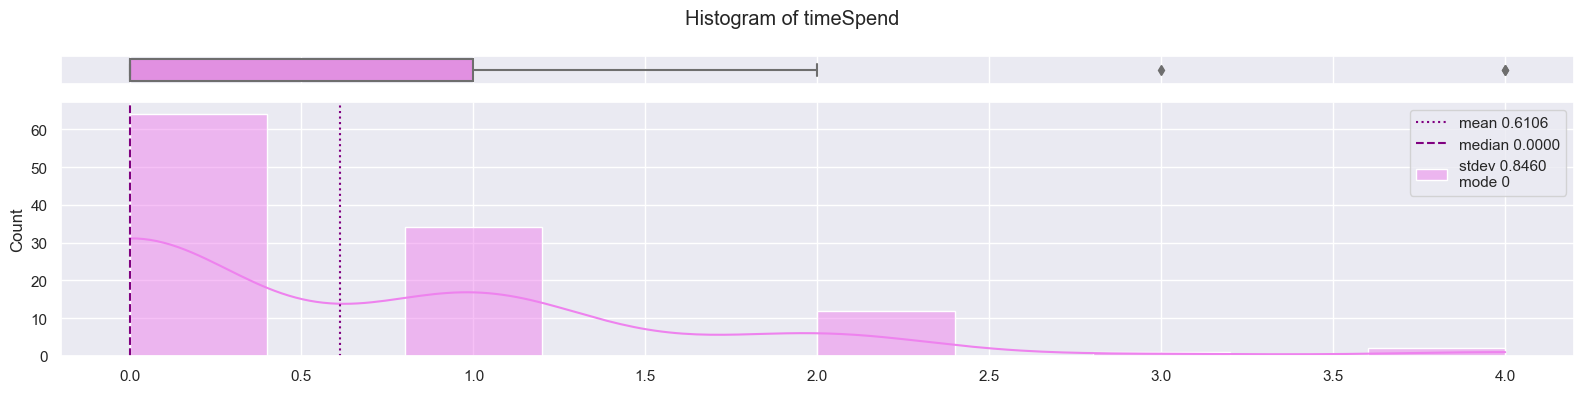

In [167]:
## Buatlah diagram histogram dari kolom Strength
histBoxPlot(data.timeSpend, title='Histogram of timeSpend', figsize=(16,4))

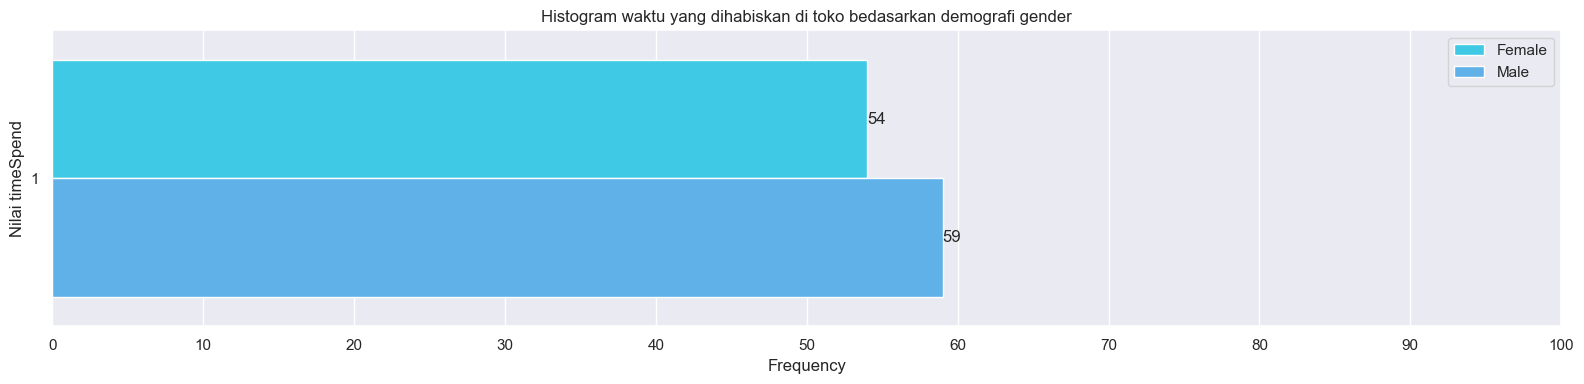

In [168]:
## ploting untuk data produk pastry 
f, ax = plt.subplots()
sns.countplot(data=data, y='itemPurchasePastries', hue='gender').set(xticks=[i for i in np.arange(0,101,10)])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("Nilai timeSpend")
plt.xlabel("Frequency")
plt.title("Histogram waktu yang dihabiskan di toko bedasarkan demografi gender")
plt.legend(['Female', 'Male'])
plt.tight_layout()

### Instruksi 6
Tampilkan histogram dari kolom timeSpend yang dikelompokkan berdasarkan gender

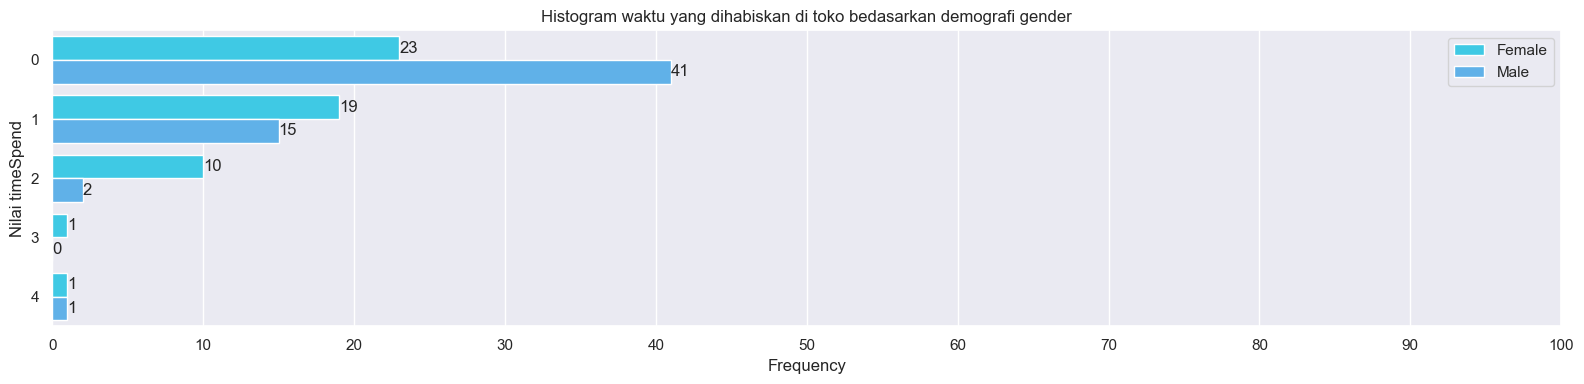

In [169]:
## ploting untuk data produk pastry 
f, ax = plt.subplots()
sns.countplot(data=data, y='timeSpend', hue='gender').set(xticks=[i for i in np.arange(0,101,10)])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("Nilai timeSpend")
plt.xlabel("Frequency")
plt.title("Histogram waktu yang dihabiskan di toko bedasarkan demografi gender")
plt.legend(['Female', 'Male'])
plt.tight_layout()

### Instruksi 7
Buatlah kesimpulan dari informasi yang Anda dapatkan di atas. 
- Feature timeSpend terdistribusi positive skew dengan nilai modus 0 dan median 0. Berdasarkan histogram dapat dilihat bahwa waktu yang dihabiskan customer kebanyakan kurang dari 2 jam.
- Product Pastries cenderung dibeli oleh customer pria dan perempuan dengan jumlah customer pria sebanyak 59 dan customer perempuan sebanyak 54.
- Kebanyakan customer menghabiskan waktu kurang dari 1 jam dengan didominasi pria sebanyak 41 orang.

<a id="2"></a> <br>
## Outliers
* Nilai outliers bisa diartikan sebagai kesalahan atau kejadian langka.
* Menghitung outlier: 
    * pertama kita perlu menghitung kuartil pertama (Q1)(25%)
    * kemudian temukan IQR(inter quartile range) = Q3-Q1
    * terakhir menghitung Q1 - 1.5*IQR dan Q3 + 1.5*IQR
    * Apa pun di luar kisaran ini adalah outlier
    * mari kita tulis kode untuk distribusi tumor jinak untuk rata-rata fitur radius

### Instruksi 8
Buatlah kesimpulan dari informasi yang Anda dapatkan dari perhitungan nilai outliers dari variabel timeSpend pada data customer dengan gender laki-laki

In [170]:
## Menghitung nilai outliers dari variabel timeSpend pada data customer dengan gender laki-laki
male = data[data["gender"] == 1]
female = data[data["gender"] == 0]
desc = male.timeSpend.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Apa pun di luar kisaran ini adalah outlier timeSpend: (", lower_bound ,",", upper_bound,")")
male[male.timeSpend < lower_bound].timeSpend
print("Outliers: ",male[(male.timeSpend < lower_bound) | (male.timeSpend > upper_bound)].timeSpend.values)

Apa pun di luar kisaran ini adalah outlier timeSpend: ( -1.5 , 2.5 )
Outliers:  [4]


Kesimpulan:

Berdasarkan hasil perhitungan diketahui bahwa jumlah customer pria yang merupakan outliers dari feature timeSpend hanya 1 orang dimana batas bawah outliers dan batas atas outliers adalah -1,5 dan 2,5.

### Instruksi 9
Hitungnilai outliers dari variabel visitNo (jumlah kedatangan) pada data customer dengan gender perempuan

In [171]:
## Menghitung nilai outliers dari variabel visitNo (jumlah kedatangan) pada data customer dengan gender perempuan
male = data[data["gender"] == 1]
female = data[data["gender"] == 0]
desc = data.visitNo.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Apa pun di luar kisaran ini adalah outlier visitNo: (", lower_bound ,",", upper_bound,")")
data[data.visitNo < lower_bound].visitNo
print("Outliers: ",data[(data.visitNo < lower_bound) | (data.visitNo > upper_bound)].visitNo.values)

Apa pun di luar kisaran ini adalah outlier visitNo: ( 0.5 , 4.5 )
Outliers:  [0 0]


Kesimpulan:

Berdasarkan hasil perhitungan diketahui bahwa jumlah customer perempuan yang merupakan outliers dari feature visitNo (jumlah kedatangan) terdapat 2 orang dimana batas bawah outliers dan batas atas outliers adalah 0,5 dan 4,5.

<a id="4"></a> <br>
## Summary Statistics
* Mean/rata-rata
* Variance: penyebaran distribusi
* Standart deviation square root dari variance
* Mari kita lihat ringkasan statistik rata-rata pancaran tumor jinak:

### Instruksi 11
Hitung nilai karakteristik statistik untuk variabel visitNo untuk gender laki-laki

In [172]:
## variabel male menyimpan data yang ada pada seluruh kolom dengan nilai gender = 1
male = data[data["gender"] == 1]
## variabel female menyimpan data yang ada pada seluruh kolom dengan nilai gender = 0
female = data[data["gender"] == 0]
print("mean: ",male.visitNo.mean())
print("variance: ",male.visitNo.var())
print("standart deviation (std): ",male.visitNo.std())
print("describe method: ",male.visitNo.describe())

mean:  2.694915254237288
variance:  0.3535943892460547
standart deviation (std):  0.5946380321221093
describe method:  count    59.000000
mean      2.694915
std       0.594638
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: visitNo, dtype: float64


<a id="6"></a> <br>
## Effect size
* Salah satu ringkasan statistik.
* Ini menggambarkan ukuran efek/effect size. Ini adalah cara sederhana untuk mengukur perbedaan antara dua kelompok.
* Dengan kata lain, ukuran efek menekankan ukuran perbedaan
* Gunakan ukuran efek kohen/cohen
* Cohen menyarankan bahwa jika d(ukuran efek)= 0,2, itu adalah ukuran efek kecil, d = 0,5 ukuran efek sedang, d = 0,8 ukuran efek besar.
* mari kita bandingkan ukuran efek antara mean radius jinak dan mean radius ganas
* Ukuran efek adalah 2.2 dan itu terlalu besar dan dikatakan bahwa dua kelompok itu berbeda satu sama lain seperti yang kita harapkan. Karena kelompok kita adalah mean radius jinak dan mean radius ganas yang berbeda satu sama lain

### Instruksi 10
Jalankan perhitungan dibawah ini. Buatlah kesimpulan dari informasi yang Anda dapatkan dari perhitungan nilai effect size dari variabel visitNo pada data customer dengan gender laki-laki. Apa terdapat perbedaan antara jumlah kedatangan dari pelanggan wanita dan pria?

In [173]:
mean_diff = male.visitNo.mean() - female.visitNo.mean()
var_male = male.visitNo.var()
var_female = female.visitNo.var()
var_pooled = (len(male)*var_male +len(female)*var_female ) / float(len(male)+ len(female))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  0.40638112114512326


Kesimpulan:

Berdasarkan hasil perhitungan diketahui bahwa ukuran effect adalah 0.4. Menurut efek cohen, dikatakan bahwa dua kelompok itu yaitu jumlah kedatangan customer pria dan jumlah kedatangan customer wanita adalah KECIL. Oleh karena itu, dua kelompok tersebut memiliki kemiripan satu sama lain.

<a id="7"></a> <br>
## Relationship Between Variables - Korelasi
* Kita dapat mengatakan bahwa dua variabel terkait satu sama lain, jika salah satunya memberikan informasi tentang yang lain
* Misalnya, harga dan jarak. Jika Anda pergi jarak jauh dengan taksi Anda akan membayar lebih. Oleh karena itu kita dapat mengatakan bahwa harga dan jarak berhubungan positif satu sama lain.
* Scatter Plot, Cara termudah untuk memeriksa hubungan antara dua variabel
* Matriks korelasi besar yang mencakup banyak angka
* Kisaran angka ini adalah -1 hingga 1. 
* Arti dari 1 adalah dua variabel yang saling berkorelasi positif seperti mean radius dan mean area
* Arti dari nol adalah tidak ada korelasi antara variabel seperti productRate dengan income
* Arti dari -1 adalah dua variabel berkorelasi negatif satu sama lain seperti income dan membershipCard. Sebenarnya korelasi antara keduanya bukan -1, melainkan -0,3 tetapi idenya adalah jika tanda korelasi negatif berarti ada adalah korelasi negatif.

### Instruksi 11
Tuliskan kesimpulan dari hasil diagram heatmap korelasi yang ada. Variabel mana saja yang saling berkorelasi? Jelaskan pendapat Anda.

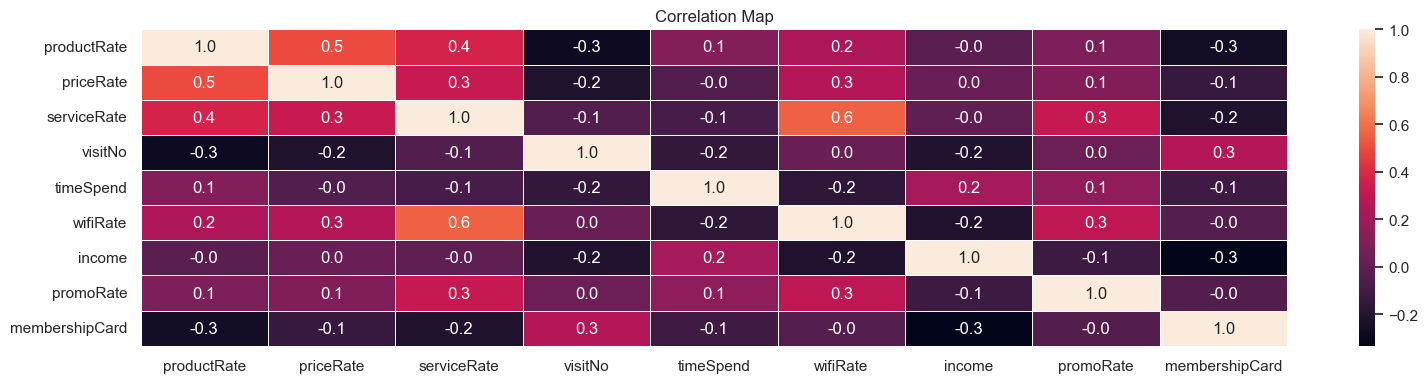

In [198]:
f,ax = plt.subplots(figsize = (16, 5))
dfs = data.loc[:,['productRate','priceRate','serviceRate','visitNo','timeSpend','wifiRate','income','promoRate','membershipCard']]
sns.heatmap(dfs.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.tight_layout()

Kesimpulan: 

Dapat dilihat bahwa kita dapat mengelompokkan feature-feature yang memiliki korelasi kuat hingga lemat. Namun yang perlu jadi catatan adalah bahwa tidak semua korelasi adalah benar karena korelasi hanya menggambarkan data yang ada. Perlu dilakukan prinsip causalitas untuk melihat related atau tidaknya korelasi antar feature.

- Korelasi Kuat:
    - priceRate dengan productRate (+)
    - wifiRate dengan serviceRate (+)
- Korelasi Sedang:
    - serviceRate dengan productRate (+)
    - serviceRate dengan priceRate (+)
    - visitNo dengan productRate (-)
    - wifiRate dengan priceRate (+)
    - promoRate dengan serviceRate (+)
    - promoRate dengan wifiRate (+)
    - membershipCard dengan productRate (-)
    - membershipCard dengan visitNo (+)
    - membershipCard dengan income (-)
- Sisanya didominasi oleh feature yang memiliki korelasi lemah atau tidak memiliki korelasi.

<a id="9"></a> <br>
## Covariance
* Covariance adalah ukuran kecenderungan dua variabel untuk bervariasi bersama-sama
* Jadi covarians dimaksimalkan jika dua vektor identik
* Covarians adalah nol jika mereka ortogonal.
* Covariance negatif jika mereka menunjuk ke arah yang berlawanan
* Mari kita lihat kovarians antara mean radius dan mean area. Kemudian lihat radius mean dan fractal dimension se


### Instruksi 11
Hitung nilai covariance antara variabel timeSpend dengan income dan timeSpend dengan visitNo

In [175]:
print("Covariance diantara timeSpend dan income: ",data.timeSpend.cov(data.income))
print("Covariance diantara timeSpend dan visitNo: ",data.timeSpend.cov(data.visitNo))

Covariance diantara timeSpend dan income:  0.20077433628318603
Covariance diantara timeSpend dan visitNo:  -0.09347345132743368


<a id="10"></a> <br>
## Pearson Correlation
* Pembagian covarians dengan standar deviasi variabel
* Mari kita lihat korelasi pearson antara mean/rata-rata radius dan mean/rata-rata area
* Pertama mari kita gunakan metode .corr() yang sebenarnya kita gunakan pada bagian korelasi. Di bagian korelasi kami sebenarnya menggunakan korelasi pearson :)
* p1 dan p2 adalah sama. Di p1 kita menggunakan metode corr(), di p2 kita menerapkan definisi korelasi pearson (cov(A,B)/(std(A)*std(B)))
* Seperti yang kita harapkan korelasi pearson antara area_mean dan area_mean adalah 1 yang berarti bahwa mereka adalah distribusi yang sama
* Untuk lebih jelas apa yang kami lakukan di bagian korelasi dan bagian korelasi pearson adalah sama.


### Instruksi 12
Pada contoh dibawah ini kita melakukan perhitungan pearson correlation pada variabel timeSpend dan serviceRate

1. Sesuaikan perintah untuk melakukan perhitungan  pearson correlation pada variabel wifiRate dan serviceRate.
2. Kesimpulan apa yang dapat Anda tarik dari dua percobaan diatas. 

Pearson correlation: 
             wifiRate  serviceRate
wifiRate     1.000000     0.555095
serviceRate  0.555095     1.000000
Pearson correlation:  0.5550950620398712


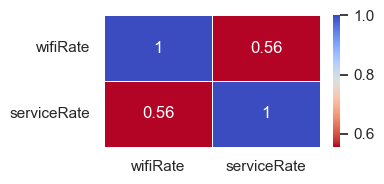

In [212]:
p1 = data.loc[:,["wifiRate","serviceRate"]].corr(method= "pearson")
p2 = data.serviceRate.cov(data.wifiRate)/(data.serviceRate.std()*data.wifiRate.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(p1, cmap='coolwarm_r', linewidths=0.5, annot=True)
plt.yticks(rotation=0)
plt.tight_layout()

Kesimpulan: 

Feature wifiRate dengan serviceRate berkorelasi kuat positif dengan nilai 0.56. Artinya semakin tingi wifiRate maka semakin tinggi juga serviceRate

<a id="11"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation bekerja dengan baik jika hubungan antara variabel linier dan variabel kira-kira normal. Tapi itu tidak kuat, jika ada outlier
* Untuk menghitung korelasi spearman, kita perlu menghitung peringkat dari setiap nilai


### Instruksi 13
Pada contoh dibawah ini kita melakukan perhitungan spearman correlation pada variabel timeSpend dan serviceRate

1. Sesuaikan perintah untuk melakukan perhitungan  pearson correlation pada variabel priceRate dan productRate.
2. Kesimpulan apa yang dapat Anda tarik dari dua percobaan diatas. 

Spearman's correlation: 
             priceRate  productRate
priceRate     1.000000     0.452944
productRate   0.452944     1.000000


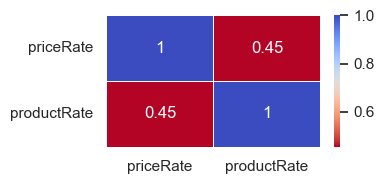

In [214]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["priceRate","productRate"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(spearman_corr, cmap='coolwarm_r', linewidths=0.5, annot=True)
plt.yticks(rotation=0)
plt.tight_layout()

Kesimpulan: 

* Feature priceRate dengan productRate berkorelasi kuat positif dengan nilai 0.56. Artinya semakin tingi priceRate maka semakin tinggi juga productRate.

* Korelasi Spearman sedikit lebih tinggi dari korelasi pearson
    * Jika hubungan antar distribusi tidak linier, korelasi spearman cenderung lebih baik dalam memperkirakan kekuatan hubungan
    * Korelasi Pearson dapat dipengaruhi oleh outlier. Sehingga Korelasi Spearman lebih kuat.

<a id="13"></a> <br>
## Hypothesis Testing
* Classical Hypothesis Testing / Pengujian Hipotesis Klasik
* Apa yang Anda perlu lakukan untuk menjawab pertanyaan berikut : "diberikan sampel dan efek nyata, berapa peluang melihat efek seperti itu secara kebetulan"
* Langkah pertama adalah mengukur ukuran efek nyata dengan memilih statistik uji. Pilihan alami untuk statistik uji adalah perbedaan mean/rata-rata antara dua kelompok.
* Langkah kedua adalah mendefinisikan hipotesis nol yaitu model sistem berdasarkan asumsi bahwa efek yang tampak tidak nyata. Hipotesis nol adalah jenis hipotesis yang digunakan dalam statistik yang menyatakan bahwa tidak ada signifikansi statistik dalam serangkaian pengamatan yang diberikan. Hipotesis nol adalah hipotesis yang orang mencoba untuk menyangkalnya. Hipotesis alternatif adalah hipotesis yang orang ingin mencoba untuk membuktikannya. 
* Langkah ketiga adalah menghitung p-value yaitu probabilitas melihat efek nyata jika hipotesis nol benar. Misalkan kita memiliki uji hipotesis nol. Kemudian kita hitung nilai p. Jika nilai p kurang dari atau sama dengan ambang batas, kami menolak hipotesis nol.
* Jika p-value rendah, pengaruh tersebut dikatakan signifikan secara statistik artinya tidak mungkin terjadi secara kebetulan. Oleh karena itu kita dapat mengatakan bahwa efeknya lebih mungkin muncul pada populasi yang lebih besar.
* Mari kita coba contohkan. Hipotesis nol: dunia rata. Hipotesis alternatif: dunia itu bulat. Beberapa ilmuwan mulai menyangkal hipotesis nol. Ini akhirnya mengarah pada refleksi hipotesis nol dan penerimaan hipotesis alternatif.
* Contoh lainnya. "efek ini nyata" ini adalah hipotesis nol. Berdasarkan asumsi itu kami menghitung probabilitas efek yang tampak. Itu adalah nilai-p. Jika nilai p rendah, kami menyimpulkan bahwa hipotesis nol tidak mungkin benar.
* Sekarang mari kita buat contoh kita:
    * Saya ingin mengetahui apakah rata-rata radius dan rata-rata area terkait satu sama lain? Hipotesis nol saya adalah bahwa "hubungan antara rata-rata radius dan rata-rata area adalah nol pada populasi tumor'.
    * Sekarang kita perlu menyangkal hipotesis nol ini untuk menunjukkan bahwa mean/rata-rata radius dan mean/rata-rata area berhubungan. (walaupun sebenarnya kita telah mengetahui hasilnya berdasarkan analisa korelasi yang telah dilakukan sebelumnya)
    * mari kita cari nilai p (nilai probabilitas)

### Instruksi 14
Pada contoh dibawah ini kita melakukan pengujian hipotesis keterhubungan variabel timeSpend dan serviceRate.

1. Sesuaikan perintah untuk melakukan perhitungan  pengujian hipotesis pada variabel gender dan productRate.
2. Kesimpulan apa yang dapat Anda tarik dari dua percobaan diatas. 

In [178]:
def ttest_related(features, alpha=0.05, h0_text=None,h1_text=None,):
    line = '='*30
    result = stats.ttest_rel(features[0], features[1])
    if result.pvalue <= alpha:
        sign = '<='
        output = f'Rejected H0 == {features[0].name} & {features[1].name} saling berhubungan/berkorelasi.'
    else:
        sign = '>'
        output = f'Failed to Reject H0 == {features[0].name} & {features[1].name} tidak berhubungan/berkolerasi.'
    return print(''.join(
        [
            f'{line}\n',
            f'T-TEST RELATED\n\n',
            f'H0: {h0_text}\n',
            f'H1: {h1_text}\n\n',
            f'--> p-value {result.pvalue} {sign} {alpha}\n',
            f'--> {output}\n'
            f'{line}\n',
        ]
    ))


In [179]:
ttest_related(
    features=[data.gender, data.productRate], 
    h0_text='Gender dan Produt Rate tidak memiliki hubungan.', 
    h1_text='Gender dan Produt Rate memiliki hubungan.')

T-TEST RELATED

H0: Gender dan Produt Rate tidak memiliki hubungan.
H1: Gender dan Produt Rate memiliki hubungan.

--> p-value 9.83197741893934e-60 <= 0.05
--> Rejected H0 == gender & productRate saling berhubungan/berkorelasi.



In [180]:
ttest_related(
    features=[data.timeSpend, data.serviceRate], 
    h0_text='Time Spend dan Service Rate tidak memiliki hubungan.', 
    h1_text='Time Spend dan Service Rate memiliki hubungan.')

T-TEST RELATED

H0: Time Spend dan Service Rate tidak memiliki hubungan.
H1: Time Spend dan Service Rate memiliki hubungan.

--> p-value 1.4365649807632511e-52 <= 0.05
--> Rejected H0 == timeSpend & serviceRate saling berhubungan/berkorelasi.

